# Esercizio 11.3

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D

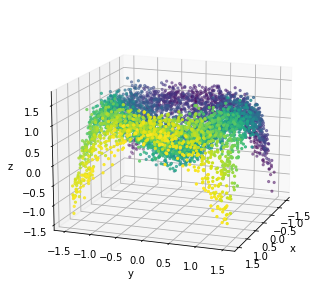

In [94]:
n_epochs=30
n_train=15000
n_valid=5000
sigma = 0.2 # noise standard deviation
np.random.seed(0) # generate training inputs

x_train = np.random.rand(n_train,2)
x_valid = np.random.rand(n_valid,2)
f_target = np.zeros(n_valid)
f_train = np.zeros(n_train)
f_valid = np.zeros(n_valid)

for i in range(len(f_target)):
    x_train [i,0] = x_train [i,0]*3-1.5
    x_valid [i,1] = x_valid [i,1]*3-1.5
    x_train [i,1] = x_train [i,1]*3-1.5
    x_valid [i,0] = x_valid [i,0]*3-1.5
    
    f_target [i] = np.sin(x_valid[i,0]**2+x_valid[i,1]**2)# ideal (target) linear function
    f_train [i] = np.random.normal(np.sin(x_train[i,0]**2+x_train[i,1]**2), sigma) # actual measures from which we want to guess regression parameters
    f_valid [i] = np.random.normal(np.sin(x_valid[i,0]**2+x_valid[i,1]**2), sigma) # actual measures from which we want to guess regression parameters

    
    
# plot training (red) and target dataset (blue)


plt.rc('axes', titlesize=5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_valid[:,0], x_valid[:,1], f_valid, c=x_valid[:,0], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(15,20)
plt.show()

In [111]:
# compose the NN model


model = tf.keras.Sequential()
model.add(Dense(20, input_dim=2,activation='tanh'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 20)                60        
_________________________________________________________________
dense_69 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_70 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_71 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_72 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_73 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_74 (Dense)             (None, 20)               

In [112]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=f_train,
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, f_valid))

Train on 15000 samples, validate on 5000 samples
Epoch 1/50
15000/15000 [==============================] - 2s 102us/sample - loss: 0.1091 - mse: 0.1091 - val_loss: 0.2638 - val_mse: 0.2638
Epoch 2/50
15000/15000 [==============================] - 1s 51us/sample - loss: 0.0903 - mse: 0.0903 - val_loss: 0.2193 - val_mse: 0.2193
Epoch 3/50
15000/15000 [==============================] - 1s 49us/sample - loss: 0.0831 - mse: 0.0831 - val_loss: 0.2151 - val_mse: 0.2151
Epoch 4/50
15000/15000 [==============================] - 1s 48us/sample - loss: 0.0770 - mse: 0.0770 - val_loss: 0.2174 - val_mse: 0.2174
Epoch 5/50
15000/15000 [==============================] - 1s 49us/sample - loss: 0.0717 - mse: 0.0717 - val_loss: 0.1787 - val_mse: 0.1787
Epoch 6/50
15000/15000 [==============================] - 1s 50us/sample - loss: 0.0662 - mse: 0.0662 - val_loss: 0.2256 - val_mse: 0.2256
Epoch 7/50
15000/15000 [==============================] - 1s 49us/sample - loss: 0.0625 - mse: 0.0625 - val_loss: 0.

In [113]:
# evaluate model
score = model.evaluate(x_valid, f_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test loss: 0.12437042328119279
Test accuracy: 0.124370456


In [114]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, f_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test loss: 0.4269954440116882
Test accuracy: 0.42699555


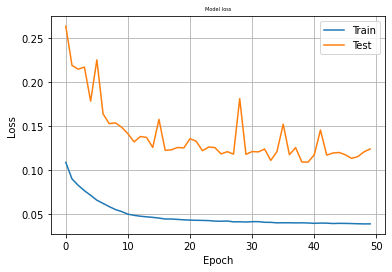

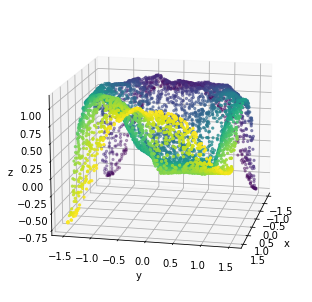

In [116]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Test'], loc='best')
plt.show()


x_predicted = np.random.rand(n_valid,2)*3-1.5
f_predicted = model.predict(x_predicted)
f_target = np.zeros(n_valid)
for i in range(len(x_predicted[0][:])):
    f_target[i]=np.sin(x_valid[0][i]**2+x_valid[1][i]**2)

    
    
    
    
plt.rc('axes', titlesize=5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_predicted[:,0], x_predicted[:,1], f_predicted, c=x_predicted[:,0], marker='.')
#ax.scatter(x_predicted[0][:], x_predicted[1][:], f_target, c=x_predicted[0][:], marker='*')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(15,12)
plt.show()

